In [1]:
#!pip install prince

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Dimensionality Reduction: MCA & FAMD Assignment

In [3]:
import prince
import pandas as pd

<IPython.core.display.Javascript object>

### Import the HR data set 

In [4]:
data = pd.read_csv("hr_dataset.csv")
data

,Age,Pay Rate,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,30,28.50,MA,1450,Female,Married,US Citizen,No,Black or African American,3317,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,34,23.00,MA,1460,Male,Divorced,US Citizen,No,Black or African American,1420,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,31,29.00,MA,2703,Male,Single,US Citizen,No,White,1154,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,32,21.50,MA,2170,Female,Married,US Citizen,No,White,58,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,30,16.56,MA,2330,Female,Single,US Citizen,No,White,940,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,48,52.25,MA,2056,Male,Single,US Citizen,No,Asian,289,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
306,36,51.00,MA,1887,Male,Single,US Citizen,No,Asian,284,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
307,34,46.00,MA,2045,Male,Single,US Citizen,No,White,284,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets
308,30,45.00,MA,2134,Male,Married,US Citizen,No,White,220,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets


<IPython.core.display.Javascript object>

### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [5]:
data.dtypes

Age                    int64
Pay Rate             float64
State                 object
Zip                    int64
Sex                   object
MaritalDesc           object
CitizenDesc           object
Hispanic/Latino       object
RaceDesc              object
Days Employed          int64
Reason For Term       object
Employment Status     object
Department            object
Position              object
Manager Name          object
Employee Source       object
Performance Score     object
dtype: object

<IPython.core.display.Javascript object>

In [6]:
data.Zip = data.Zip.astype(str).str.zfill(5)

<IPython.core.display.Javascript object>

In [7]:
data.dtypes

Age                    int64
Pay Rate             float64
State                 object
Zip                   object
Sex                   object
MaritalDesc           object
CitizenDesc           object
Hispanic/Latino       object
RaceDesc              object
Days Employed          int64
Reason For Term       object
Employment Status     object
Department            object
Position              object
Manager Name          object
Employee Source       object
Performance Score     object
dtype: object

<IPython.core.display.Javascript object>

### Pull out the categorical variables and note the dimensions of the data set.

In [8]:
data_cat = data.select_dtypes(include="O")
print(data_cat.shape)
data_cat

(310, 14)


,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,MA,01450,Female,Married,US Citizen,No,Black or African American,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,MA,01460,Male,Divorced,US Citizen,No,Black or African American,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,MA,02703,Male,Single,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,MA,02170,Female,Married,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,MA,02330,Female,Single,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,MA,02056,Male,Single,US Citizen,No,Asian,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
306,MA,01887,Male,Single,US Citizen,No,Asian,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
307,MA,02045,Male,Single,US Citizen,No,White,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets
308,MA,02134,Male,Married,US Citizen,No,White,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets


<IPython.core.display.Javascript object>

### Reduce these categorical features down to two dimensions using MCA.

In [9]:
mca = prince.MCA()
mca.fit(data_cat)
coordinates = mca.transform(data_cat)
coordinates

,0,1
0,0.072089,0.194273
1,0.299378,0.215045
2,0.118310,0.304725
3,0.025348,0.105791
4,0.257756,0.109321
...,...,...
305,-0.010552,1.954861
306,-0.041154,1.610209
307,-0.009286,1.535042
308,-0.030716,1.726757


<IPython.core.display.Javascript object>

### Plot the coordinates of each resulting dimension.

<AxesSubplot:title={'center':'Row and column principal coordinates'}, xlabel='Component 0 (1.79% inertia)', ylabel='Component 1 (1.50% inertia)'>

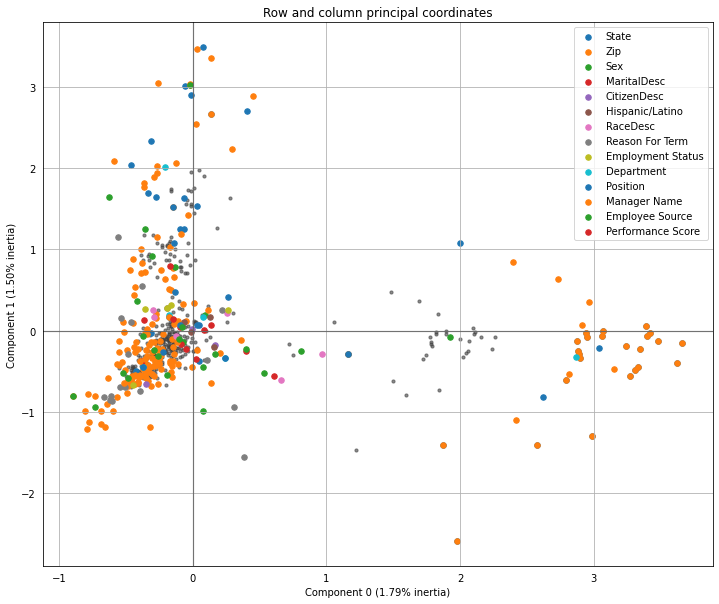

<IPython.core.display.Javascript object>

In [10]:
mca.plot_coordinates(data_cat,figsize=(12,10))


### One hot encode the categorical features and note the change in dimensions in the data set.

In [11]:
data_cat_one_hot = pd.get_dummies(data_cat)
print(data_cat_one_hot.shape)
data_cat_one_hot

(310, 313)


,State_AL,State_AZ,State_CA,State_CO,State_CT,State_FL,State_GA,State_ID,State_IN,State_KY,...,Employee Source_Vendor Referral,Employee Source_Website Banner Ads,Employee Source_Word of Mouth,Performance Score_90-day meets,Performance Score_Exceeds,Performance Score_Exceptional,Performance Score_Fully Meets,Performance Score_N/A- too early to review,Performance Score_Needs Improvement,Performance Score_PIP
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<IPython.core.display.Javascript object>

In [12]:
# number of columns went from 14 to over 300

<IPython.core.display.Javascript object>

### Reduce the one hot encoded categorical features down to two dimensions using CA.

In [13]:
ca = prince.CA()
ca.fit(data_cat_one_hot)
coordinates = ca.transform(data_cat_one_hot)
coordinates

,0,1
0,0.072487,0.181265
1,0.298522,0.200591
2,0.117644,0.290789
3,0.027075,0.090022
4,0.261186,0.084793
...,...,...
305,0.000946,1.934104
306,-0.032412,1.593070
307,-0.003254,1.527707
308,-0.022894,1.720080


<IPython.core.display.Javascript object>

### Plot the coordinates of each resulting dimension.

<AxesSubplot:title={'center':'Principal coordinates'}, xlabel='Component 0 (1.79% inertia)', ylabel='Component 1 (1.50% inertia)'>

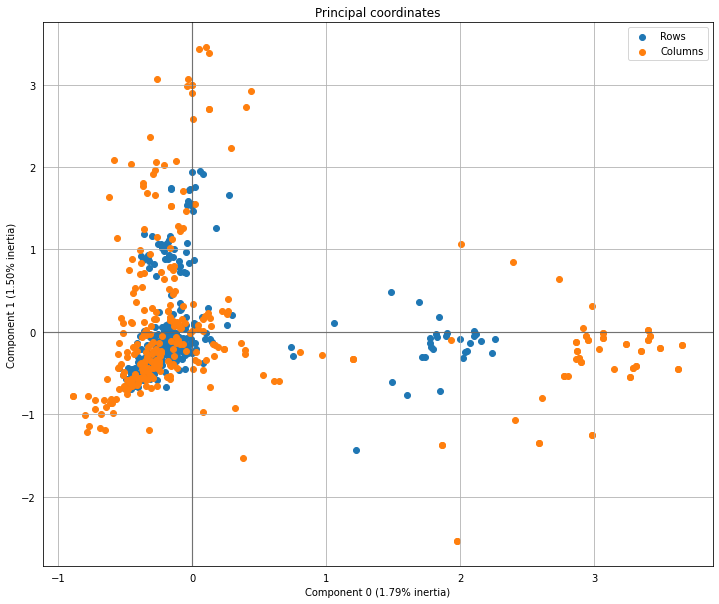

<IPython.core.display.Javascript object>

In [14]:
ca.plot_coordinates(
    data_cat_one_hot, show_col_labels=False, show_row_labels=False, figsize=(12, 10)
)

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

In [15]:
famd = prince.FAMD()
famd.fit(data)
coordinates = famd.transform(data)
coordinates

,0,1
0,0.766106,2.253776
1,-0.067194,0.369730
2,0.044682,-0.208847
3,-0.991590,-1.342849
4,-0.808423,-0.359583
...,...,...
305,1.152688,-2.045262
306,0.947758,-2.122059
307,0.748267,-2.049974
308,0.662310,-2.304813


<IPython.core.display.Javascript object>

### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.

<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (3.91% inertia)', ylabel='Component 1 (3.16% inertia)'>

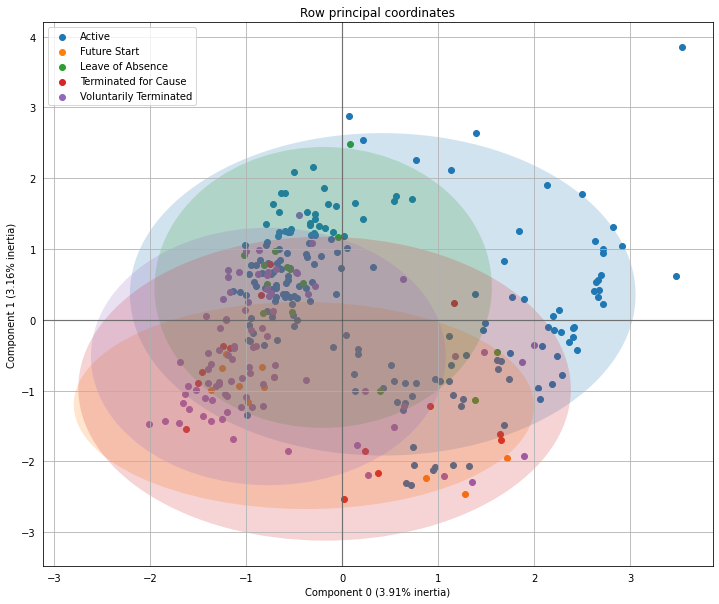

<IPython.core.display.Javascript object>

In [16]:
famd.plot_row_coordinates(
    data, figsize=(12, 10), color_labels=data["Employment Status"]
)